# Presentación:
El objetivo de este trabajo es poder predecir mediante un modelo de clasificación si un paciente estará internado más o menos de una semana, en función de su edad, sexo y medición de signos vitales en los dos primeros días de internación

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import xlrd

In [2]:
df = pd.read_csv('dfRECORTADO.csv')
df

,ID,PacienteAnos,PacienteSexo,DiasInternacion,CondicionAlCierre,fc1,fc2A,fc2B,fc2C,fr1,...,PAMIN2B,PAMIN2C,TEMP1,TEMP2A,TEMP2B,TEMP2C,O2SAT1,O2SAT2A,O2SAT2B,O2SAT2C
0,318853,62,MASCULINO,109,DEFUNCION,80.0,93.0,89.0,90.0,20.0,...,70.0,70.0,36.2,36.5,36.4,36.4,97.0,94.0,95.0,92.0
1,318906,57,FEMENINO,15,ALTA MEDICA,75.0,91.0,85.0,86.0,19.0,...,76.0,85.0,36.4,36.0,36.6,36.0,90.0,99.0,99.0,96.0
2,318909,50,MASCULINO,9,ALTA MEDICA,80.0,61.0,72.0,69.0,20.0,...,71.0,83.0,36.7,36.0,36.0,36.0,89.0,96.0,99.0,97.0
3,318942,44,MASCULINO,3,ALTA MEDICA,85.0,63.0,74.0,70.0,20.0,...,80.0,60.0,36.8,36.0,36.3,36.0,96.0,97.0,97.0,96.0
4,318970,66,MASCULINO,6,ALTA MEDICA,89.0,83.0,76.0,87.0,20.0,...,60.0,80.0,35.8,36.0,36.0,36.0,95.0,97.0,97.0,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1826,386408,36,FEMENINO,3,ALTA MEDICA,78.0,81.0,80.0,80.0,20.0,...,80.0,80.0,36.0,36.5,35.5,35.5,98.0,98.0,98.0,98.0
1827,386436,24,FEMENINO,5,ALTA MEDICA,78.0,110.0,97.0,83.0,22.0,...,77.0,81.0,36.0,38.0,37.5,37.3,100.0,96.0,96.0,96.0
1828,386863,42,MASCULINO,3,DEFUNCION,105.0,94.0,98.0,100.0,20.0,...,110.0,103.0,36.2,36.0,36.1,36.1,98.0,98.0,98.0,97.0
1829,386947,30,MASCULINO,4,ALTA MEDICA,80.0,80.0,75.0,81.0,20.0,...,60.0,80.0,36.0,36.0,36.0,36.0,96.0,96.0,97.0,97.0


# Exploración y preparación del Data set


**Información de las columnas que contiene el Data Set:**
- ID: Número para identficar al paciente (en forma anónima)	
- PacienteAnos: Edad del paciente
- PacienteSexo: sexo del paciente
- DiasInternacion: cantidad de días que el paciente estuvo en Terapia Intensiva	
- CondicionAlCierre: Cuál fue la situación del paciente al dejar la Terapia Intensiva: alta, defunción, etc.	
- fc1: Primer registro de Frecuencia Cardíaca medido al paciente durante su internación en Terapia Intensiva
- fc2A/fc2B/fc2C: Tres primeras mediciones de Frecuencia Cardíaca medidas al paciente durante se segundo día en Terapia Intensiva
- fr1: Primer registro de Frecuencia Respiratoria medido al paciente durante su internación en Terapia Intensiva
- fr2A/fr2B/fr2C: Tres primeras mediciones de Frecuencia respiratoria medidas al paciente durante se segundo día en Terapia Intensiva
- PAMAX1: Primer registro de Presión Arterial Máxima medido al paciente durante su internación en Terapia Intensiva
- PAMAX2A/PAMAX2B/PAMAX2C: Tres primeras mediciones de Presión Arterial Máxima medidas al paciente durante se segundo día en Terapia Intensiva
- PAMIN1: Primer registro de Presión Arterial Mínima medido al paciente durante su internación en Terapia Intensiva
- PAMIN2A/PAMIN2B/PAMIN2C: Tres primeras mediciones de Presión Arterial Mínima medidas al paciente durante se segundo día en Terapia Intensiva
- TEMP1: Primer registro de Temperatura medido al paciente durante su internación en Terapia Intensiva
- TEMP2A/TEMP2B/TEMP2C: Tres primeras mediciones de Temperatura medidas al paciente durante se segundo día en Terapia Intensiva
- O2SAT1: Primer registro de Saturación de Oxigeno medido al paciente durante su internación en Terapia Intensiva
- O2SAT1/O2SAT2A/O2SAT2B/O2SAT2C: Tres primeras mediciones de Saturación de Oxigeno medidas al paciente durante se segundo día en Terapia Intensiva

Se dummifica la columna de sexo

In [3]:
df['PacienteSexo']=pd.get_dummies(df['PacienteSexo'], drop_first=True)


Se eliminan las columnas de ID y de Condición al cierre que no se utilizarán

In [4]:
df = df.drop(['ID', 'CondicionAlCierre'], axis=1)

In [5]:
#se ubica el target en la primera columna
priCol = df.pop('DiasInternacion')
  
df.insert(0, 'DiasInternacion', priCol)

In [6]:
df.head()

,DiasInternacion,PacienteAnos,PacienteSexo,fc1,fc2A,fc2B,fc2C,fr1,fr2A,fr2B,...,PAMIN2B,PAMIN2C,TEMP1,TEMP2A,TEMP2B,TEMP2C,O2SAT1,O2SAT2A,O2SAT2B,O2SAT2C
0,109,62,1,80.0,93.0,89.0,90.0,20.0,18.0,20.0,...,70.0,70.0,36.2,36.5,36.4,36.4,97.0,94.0,95.0,92.0
1,15,57,0,75.0,91.0,85.0,86.0,19.0,18.0,20.0,...,76.0,85.0,36.4,36.0,36.6,36.0,90.0,99.0,99.0,96.0
2,9,50,1,80.0,61.0,72.0,69.0,20.0,19.0,20.0,...,71.0,83.0,36.7,36.0,36.0,36.0,89.0,96.0,99.0,97.0
3,3,44,1,85.0,63.0,74.0,70.0,20.0,18.0,20.0,...,80.0,60.0,36.8,36.0,36.3,36.0,96.0,97.0,97.0,96.0
4,6,66,1,89.0,83.0,76.0,87.0,20.0,20.0,18.0,...,60.0,80.0,35.8,36.0,36.0,36.0,95.0,97.0,97.0,96.0


In [7]:
df.describe()

,DiasInternacion,PacienteAnos,PacienteSexo,fc1,fc2A,fc2B,fc2C,fr1,fr2A,fr2B,...,PAMIN2B,PAMIN2C,TEMP1,TEMP2A,TEMP2B,TEMP2C,O2SAT1,O2SAT2A,O2SAT2B,O2SAT2C
count,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.00000,1831.000000,...,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000
mean,8.097761,48.224468,0.458766,86.885309,83.637357,82.561988,82.495904,20.458220,19.80994,19.725833,...,70.388859,71.042054,36.313545,36.344566,36.289405,36.319279,96.660295,96.545057,96.626434,96.563626
std,9.848678,21.822367,0.498433,18.005341,17.035950,16.565596,17.081670,4.545853,4.13897,4.314948,...,12.450802,13.008021,0.666245,0.580015,0.530447,0.522985,2.238108,2.199110,2.035811,1.921170
min,3.000000,0.000000,0.000000,24.000000,18.000000,10.000000,11.000000,9.000000,8.00000,7.000000,...,20.000000,18.000000,32.800000,34.500000,34.300000,34.000000,74.000000,60.000000,76.000000,79.000000
25%,3.000000,33.000000,0.000000,75.000000,73.000000,72.000000,72.000000,19.000000,18.00000,18.000000,...,60.000000,60.000000,36.000000,36.000000,36.000000,36.000000,96.000000,96.000000,96.000000,96.000000
50%,5.000000,48.000000,0.000000,84.000000,80.000000,80.000000,80.000000,20.000000,20.00000,20.000000,...,70.000000,70.000000,36.200000,36.200000,36.200000,36.200000,97.000000,97.000000,97.000000,97.000000
75%,9.000000,64.500000,1.000000,97.000000,92.000000,90.000000,90.000000,20.000000,20.00000,20.000000,...,80.000000,80.000000,36.600000,36.600000,36.500000,36.500000,98.000000,98.000000,98.000000,98.000000
max,136.000000,97.000000,1.000000,182.000000,178.000000,173.000000,170.000000,80.000000,74.00000,78.000000,...,143.000000,140.000000,39.800000,40.000000,41.300000,39.900000,100.000000,100.000000,100.000000,100.000000


<Figure size 432x288 with 0 Axes>

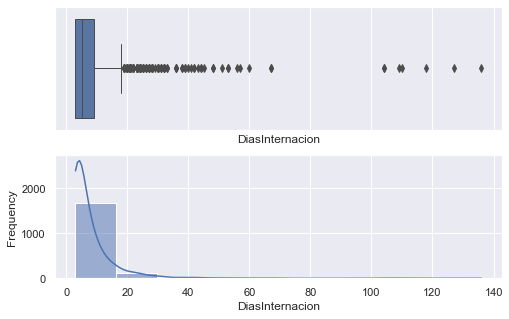

<Figure size 576x360 with 0 Axes>

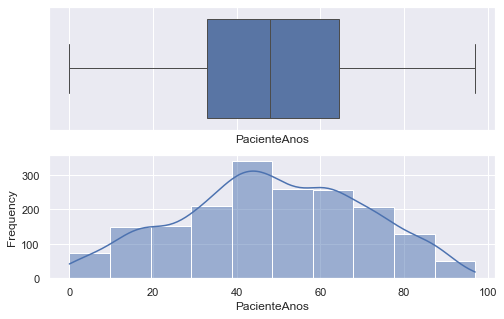

<Figure size 576x360 with 0 Axes>

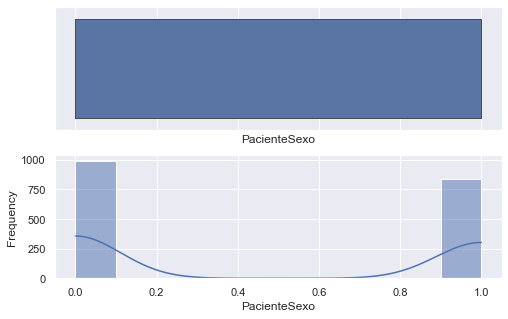

<Figure size 576x360 with 0 Axes>

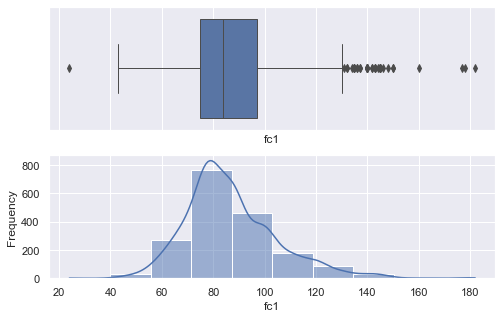

<Figure size 576x360 with 0 Axes>

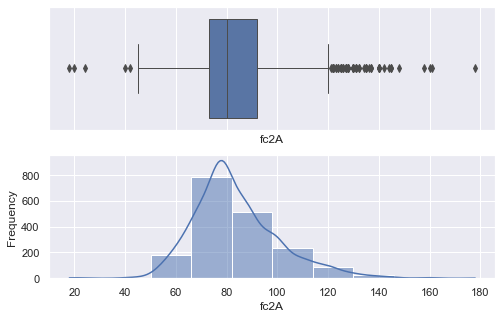

<Figure size 576x360 with 0 Axes>

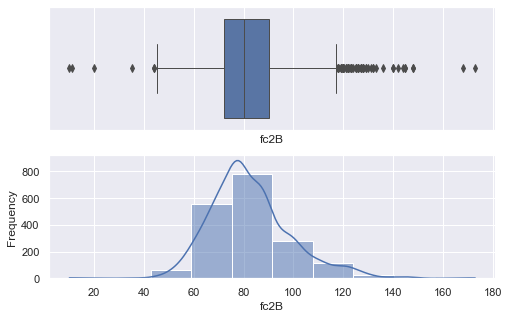

<Figure size 576x360 with 0 Axes>

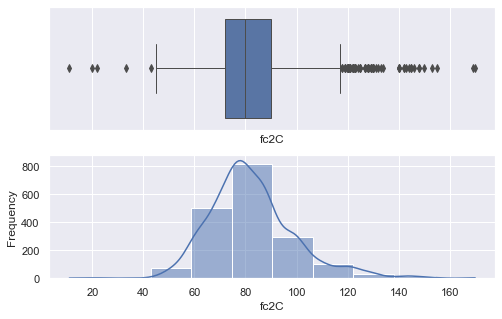

<Figure size 576x360 with 0 Axes>

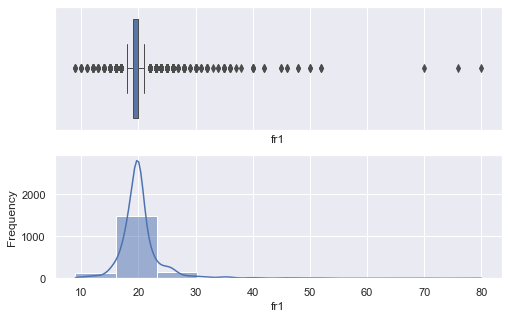

<Figure size 576x360 with 0 Axes>

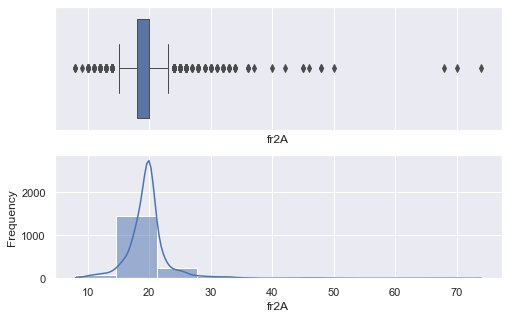

<Figure size 576x360 with 0 Axes>

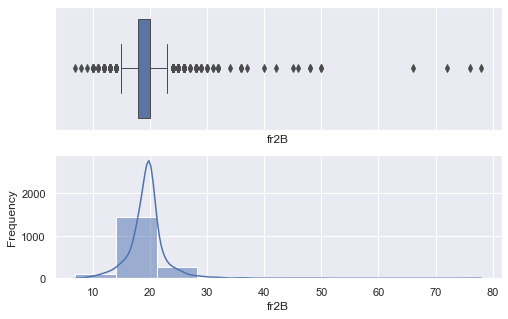

<Figure size 576x360 with 0 Axes>

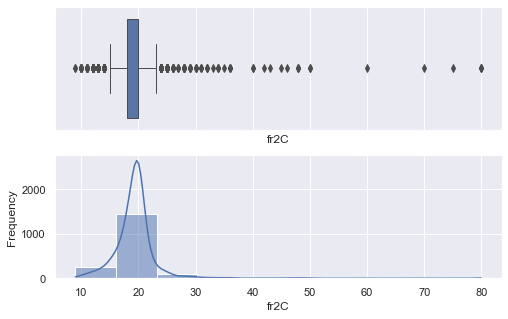

<Figure size 576x360 with 0 Axes>

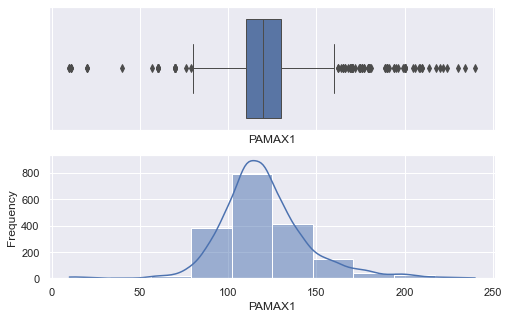

<Figure size 576x360 with 0 Axes>

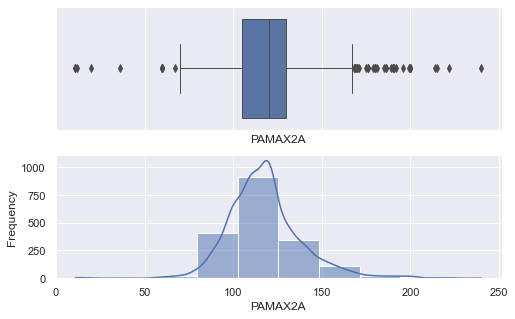

<Figure size 576x360 with 0 Axes>

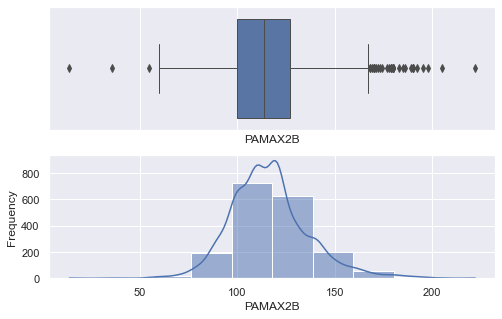

<Figure size 576x360 with 0 Axes>

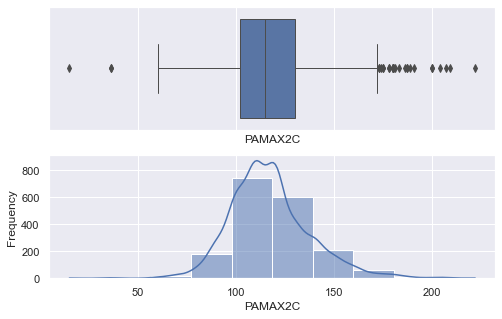

<Figure size 576x360 with 0 Axes>

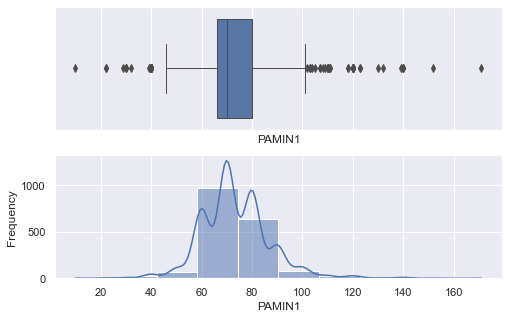

<Figure size 576x360 with 0 Axes>

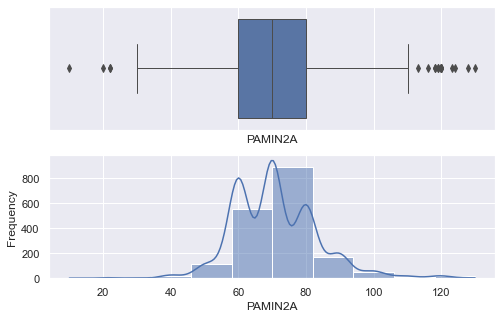

<Figure size 576x360 with 0 Axes>

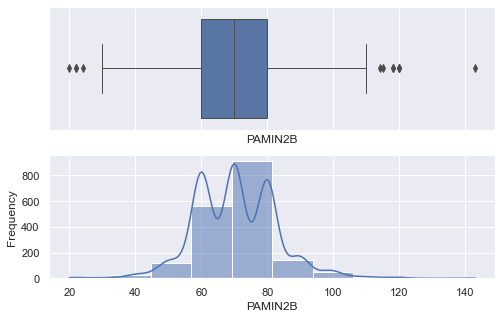

<Figure size 576x360 with 0 Axes>

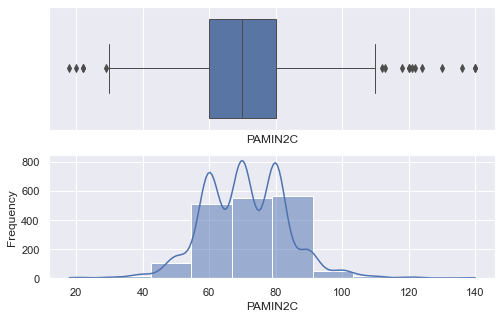

<Figure size 576x360 with 0 Axes>

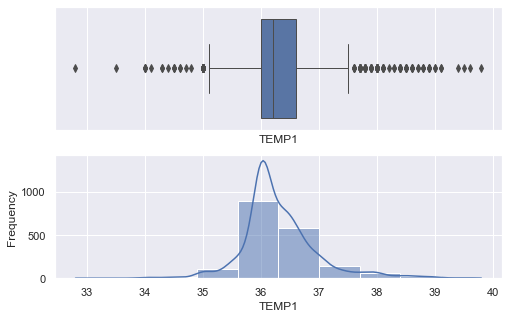

<Figure size 576x360 with 0 Axes>

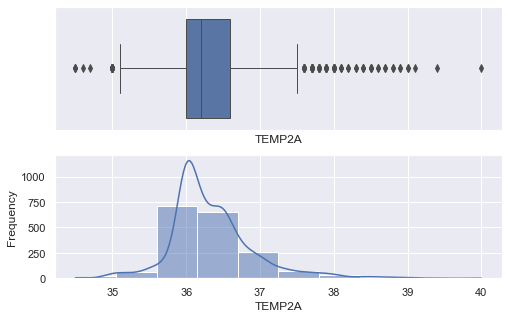

<Figure size 576x360 with 0 Axes>

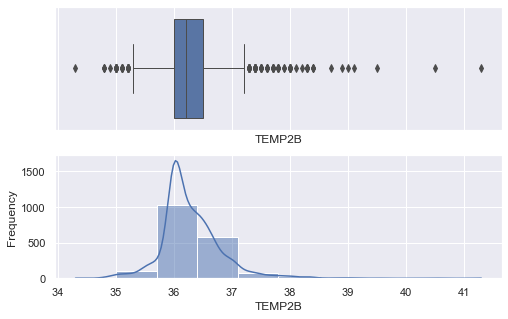

<Figure size 576x360 with 0 Axes>

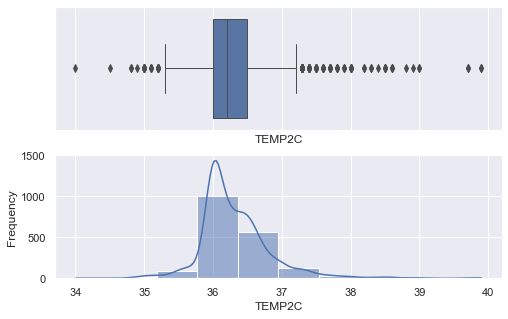

<Figure size 576x360 with 0 Axes>

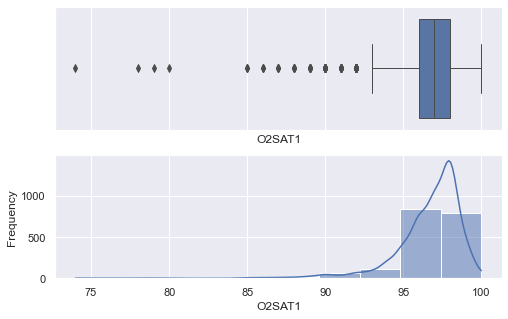

<Figure size 576x360 with 0 Axes>

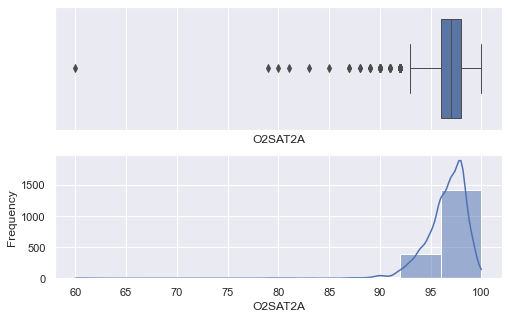

<Figure size 576x360 with 0 Axes>

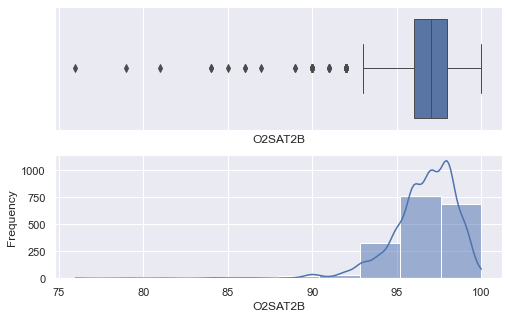

<Figure size 576x360 with 0 Axes>

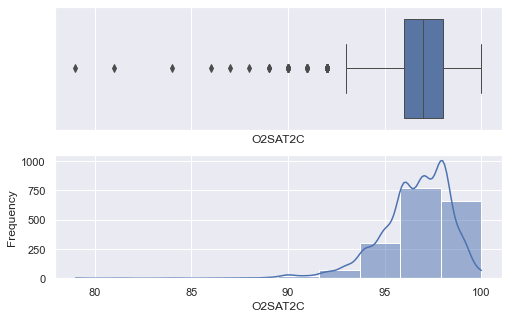

In [8]:
for i in df.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i],  ax=ax_box , linewidth= 1.0)
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True)



Para visualizar la correlación se tomarán solamente las primeras medidas de cada signo vital

In [9]:
dfCorr = df[['DiasInternacion', 'PacienteAnos', 'PacienteSexo','fc2C', 'fr2C','PAMAX2C', 'PAMIN2C','TEMP2C','O2SAT2C']]

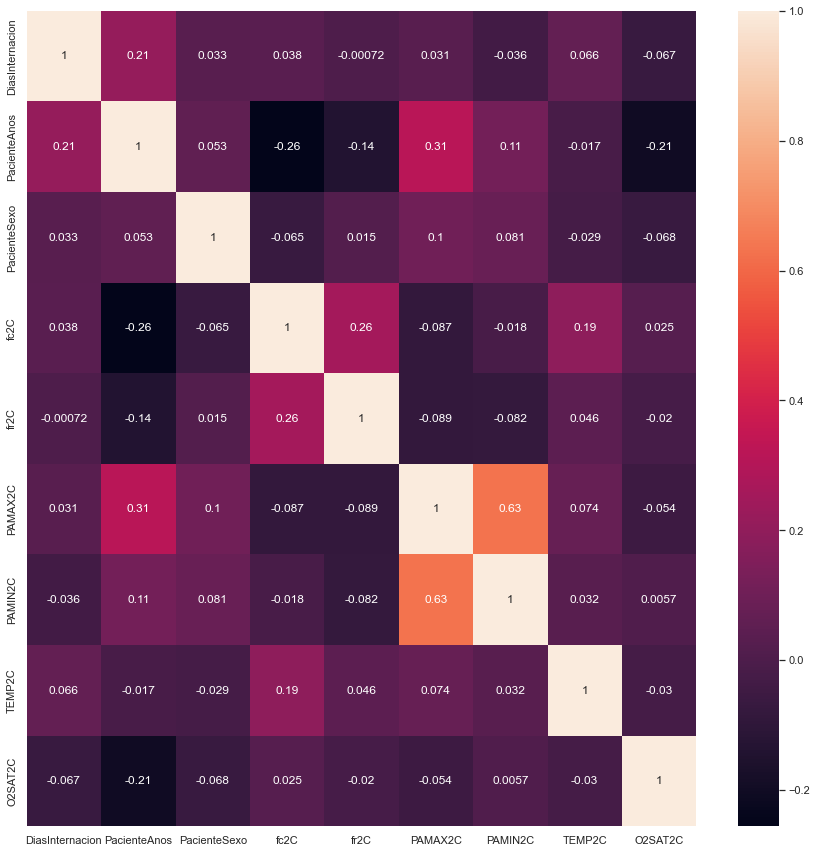

In [10]:
plt.figure(figsize=(15, 15))
corr = dfCorr.corr()
sns.heatmap(corr, annot=True)
plt.show()

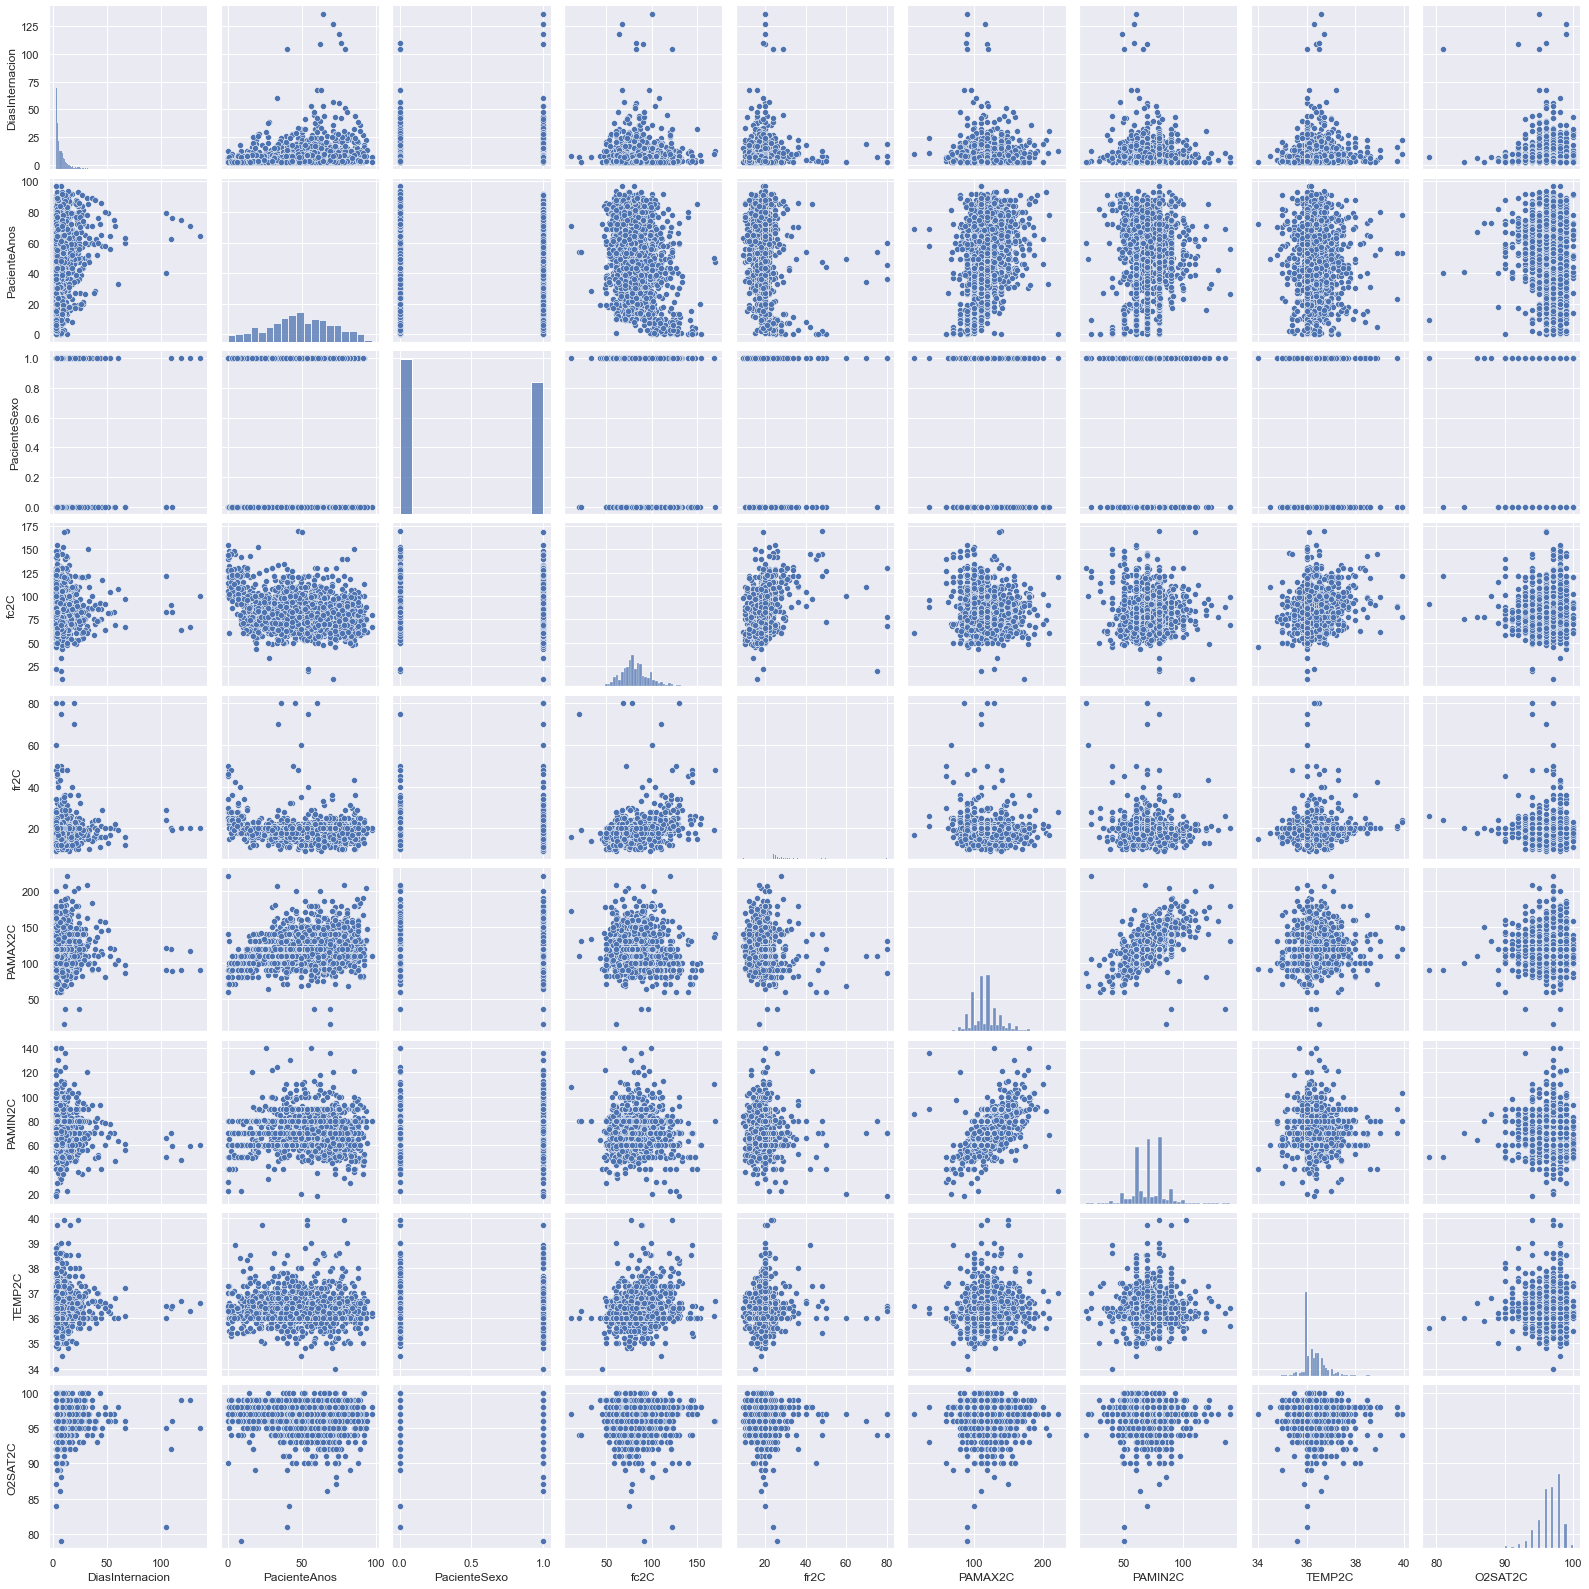

In [11]:
sns.pairplot(dfCorr)
plt.show()

En forma visual no se desprende que haya una clara correlación entre el target (días de internación) con ninguna de las demás variables.

In [12]:
from scipy import stats

for i in df:
    shapiro_test = stats.shapiro(df[i])
    print('Para la variable ', i, "con un p-value de ", shapiro_test.pvalue)
    if shapiro_test.pvalue>0.05:
        print('Probablemente Gaussiana\n')
    else:
        print("Probablemente no Gaussiana\n")

Para la variable  DiasInternacion con un p-value de  0.0
Probablemente no Gaussiana

Para la variable  PacienteAnos con un p-value de  1.0874096761925856e-11
Probablemente no Gaussiana

Para la variable  PacienteSexo con un p-value de  0.0
Probablemente no Gaussiana

Para la variable  fc1 con un p-value de  5.725716927592842e-24
Probablemente no Gaussiana

Para la variable  fc2A con un p-value de  1.4485682408617912e-23
Probablemente no Gaussiana

Para la variable  fc2B con un p-value de  8.830062162227289e-22
Probablemente no Gaussiana

Para la variable  fc2C con un p-value de  2.4517719625900335e-23
Probablemente no Gaussiana

Para la variable  fr1 con un p-value de  0.0
Probablemente no Gaussiana

Para la variable  fr2A con un p-value de  0.0
Probablemente no Gaussiana

Para la variable  fr2B con un p-value de  0.0
Probablemente no Gaussiana

Para la variable  fr2C con un p-value de  0.0
Probablemente no Gaussiana

Para la variable  PAMAX1 con un p-value de  7.694755175510928e-29
Pr

# Preprocesado
Observaciones: no hay ninguna columna con distribución normal y todas tienen outliers. Correspondería aplicar Robustscaler en todos los casos, pero tras un comparación preliminar se descubre que funciona mejor si se hace una normalización sobre todas las columnas, menos en el target (porque no corresponden aplicar preprocesado allí) ni en la columna de sexo que ya fue "dummificada"

In [13]:
from sklearn import preprocessing 

#RobustScaler para las columnas con outliers
columnsN = ['PacienteAnos','fc1', 'fc2A',
       'fc2B', 'fc2C', 'fr1', 'fr2A', 'fr2B', 'fr2C', 'PAMAX1', 'PAMAX2A',
       'PAMAX2B', 'PAMAX2C', 'PAMIN1', 'PAMIN2A', 'PAMIN2B', 'PAMIN2C',
       'TEMP1', 'TEMP2A', 'TEMP2B', 'TEMP2C', 'O2SAT1', 'O2SAT2A', 'O2SAT2B',
       'O2SAT2C']
scaler = preprocessing.MinMaxScaler().fit(df[columnsN])
df[columnsN] = scaler.transform(df[columnsN])

df.head()

,DiasInternacion,PacienteAnos,PacienteSexo,fc1,fc2A,fc2B,fc2C,fr1,fr2A,fr2B,...,PAMIN2B,PAMIN2C,TEMP1,TEMP2A,TEMP2B,TEMP2C,O2SAT1,O2SAT2A,O2SAT2B,O2SAT2C
0,109,0.639175,1,0.354430,0.46875,0.484663,0.496855,0.154930,0.151515,0.183099,...,0.406504,0.426230,0.485714,0.363636,0.300000,0.406780,0.884615,0.850,0.791667,0.619048
1,15,0.587629,0,0.322785,0.45625,0.460123,0.471698,0.140845,0.151515,0.183099,...,0.455285,0.549180,0.514286,0.272727,0.328571,0.338983,0.615385,0.975,0.958333,0.809524
2,9,0.515464,1,0.354430,0.26875,0.380368,0.364780,0.154930,0.166667,0.183099,...,0.414634,0.532787,0.557143,0.272727,0.242857,0.338983,0.576923,0.900,0.958333,0.857143
3,3,0.453608,1,0.386076,0.28125,0.392638,0.371069,0.154930,0.151515,0.183099,...,0.487805,0.344262,0.571429,0.272727,0.285714,0.338983,0.846154,0.925,0.875000,0.809524
4,6,0.680412,1,0.411392,0.40625,0.404908,0.477987,0.154930,0.181818,0.154930,...,0.325203,0.508197,0.428571,0.272727,0.242857,0.338983,0.807692,0.925,0.875000,0.809524


Se crea columna de grupos categoricos en función de los días de internación

In [14]:
df['GruposDiasInternacion']= df.apply(lambda x: 0 if int(x["DiasInternacion"]) < 8 \
                                         else 1, axis=1)
#poner la columna al principio
priCol = df.pop('GruposDiasInternacion')  
df.insert(0, 'GruposDiasInternacion', priCol)

df['GruposDiasInternacion'] = pd.to_numeric(df['GruposDiasInternacion'])



df.head()

,GruposDiasInternacion,DiasInternacion,PacienteAnos,PacienteSexo,fc1,fc2A,fc2B,fc2C,fr1,fr2A,...,PAMIN2B,PAMIN2C,TEMP1,TEMP2A,TEMP2B,TEMP2C,O2SAT1,O2SAT2A,O2SAT2B,O2SAT2C
0,1,109,0.639175,1,0.354430,0.46875,0.484663,0.496855,0.154930,0.151515,...,0.406504,0.426230,0.485714,0.363636,0.300000,0.406780,0.884615,0.850,0.791667,0.619048
1,1,15,0.587629,0,0.322785,0.45625,0.460123,0.471698,0.140845,0.151515,...,0.455285,0.549180,0.514286,0.272727,0.328571,0.338983,0.615385,0.975,0.958333,0.809524
2,1,9,0.515464,1,0.354430,0.26875,0.380368,0.364780,0.154930,0.166667,...,0.414634,0.532787,0.557143,0.272727,0.242857,0.338983,0.576923,0.900,0.958333,0.857143
3,0,3,0.453608,1,0.386076,0.28125,0.392638,0.371069,0.154930,0.151515,...,0.487805,0.344262,0.571429,0.272727,0.285714,0.338983,0.846154,0.925,0.875000,0.809524
4,0,6,0.680412,1,0.411392,0.40625,0.404908,0.477987,0.154930,0.181818,...,0.325203,0.508197,0.428571,0.272727,0.242857,0.338983,0.807692,0.925,0.875000,0.809524


In [15]:
df['GruposDiasInternacion'].value_counts()

0    1231
1     600
Name: GruposDiasInternacion, dtype: int64

De los datos con los que se cuentan 1231 pacientes estuvieron internados menos de una semana y 600 más de una semana.
Se dividirá este Data Set para entrenar un modelo que aprenda a clasificar entre uno y otro grupo y otra porción, menor que permitirá evaluar cómo mide el modelo.

# División Train/Test

In [16]:
X = df.drop(['GruposDiasInternacion', 'DiasInternacion'],axis=1)
y = df[['GruposDiasInternacion']]

y.head()

,GruposDiasInternacion
0,1
1,1
2,1
3,0
4,0


In [17]:
X.head()

,PacienteAnos,PacienteSexo,fc1,fc2A,fc2B,fc2C,fr1,fr2A,fr2B,fr2C,...,PAMIN2B,PAMIN2C,TEMP1,TEMP2A,TEMP2B,TEMP2C,O2SAT1,O2SAT2A,O2SAT2B,O2SAT2C
0,0.639175,1,0.354430,0.46875,0.484663,0.496855,0.154930,0.151515,0.183099,0.154930,...,0.406504,0.426230,0.485714,0.363636,0.300000,0.406780,0.884615,0.850,0.791667,0.619048
1,0.587629,0,0.322785,0.45625,0.460123,0.471698,0.140845,0.151515,0.183099,0.154930,...,0.455285,0.549180,0.514286,0.272727,0.328571,0.338983,0.615385,0.975,0.958333,0.809524
2,0.515464,1,0.354430,0.26875,0.380368,0.364780,0.154930,0.166667,0.183099,0.169014,...,0.414634,0.532787,0.557143,0.272727,0.242857,0.338983,0.576923,0.900,0.958333,0.857143
3,0.453608,1,0.386076,0.28125,0.392638,0.371069,0.154930,0.151515,0.183099,0.154930,...,0.487805,0.344262,0.571429,0.272727,0.285714,0.338983,0.846154,0.925,0.875000,0.809524
4,0.680412,1,0.411392,0.40625,0.404908,0.477987,0.154930,0.181818,0.154930,0.154930,...,0.325203,0.508197,0.428571,0.272727,0.242857,0.338983,0.807692,0.925,0.875000,0.809524


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = 0.7)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1281, 26) (550, 26) (1281, 1) (550, 1)


# Modelos y entrenamiento

In [19]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()

In [20]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver = 'lbfgs', random_state=42)

In [21]:
from sklearn.svm import SVC
SVC = SVC(kernel='linear')

In [22]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=42)

In [23]:
KNN.fit(X_train, y_train)
LR.fit(X_train, y_train)
SVC.fit(X_train, y_train)
RF.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [24]:
y_pred_KNN = KNN.predict(X_test)
y_pred_LR = LR.predict(X_test)
y_pred_SVC = SVC.predict(X_test)
y_pred_RF = RF.predict(X_test)

# Resultados

In [25]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

Text(0.5, 320.8, 'Predicción')

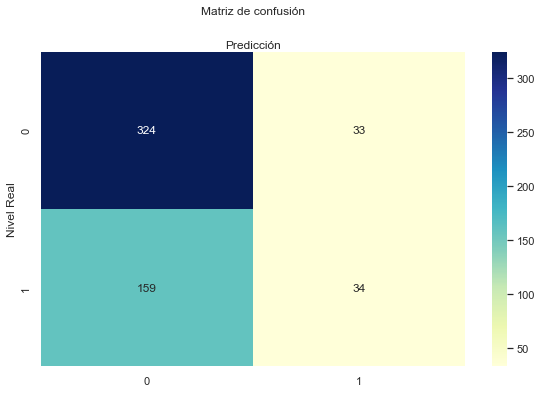

In [26]:
KNN_matrix = metrics.confusion_matrix(y_test, y_pred_KNN)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(KNN_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de confusión', y=1.1)
plt.ylabel('Nivel Real')
plt.xlabel('Predicción')

Text(0.5, 320.8, 'Predicción')

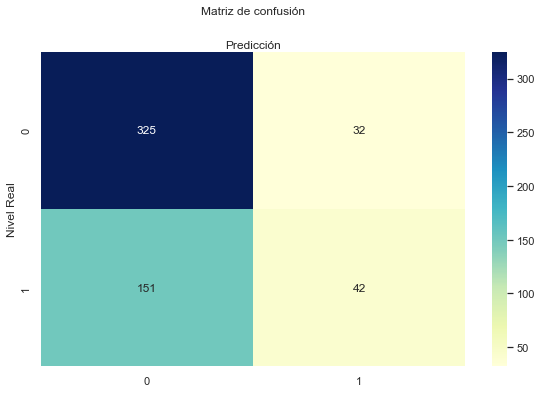

In [27]:
LR_matrix = metrics.confusion_matrix(y_test, y_pred_LR)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(LR_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de confusión', y=1.1)
plt.ylabel('Nivel Real')
plt.xlabel('Predicción')

Text(0.5, 320.8, 'Predicción')

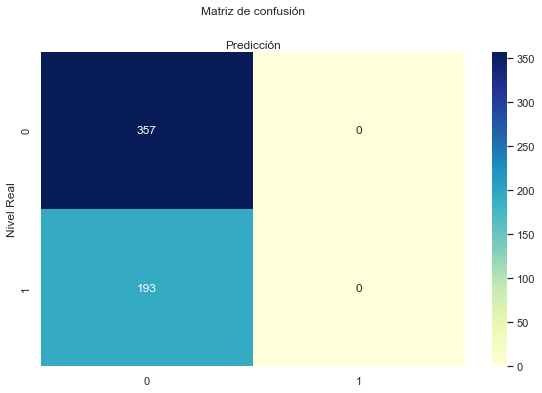

In [28]:
SVC_matrix = metrics.confusion_matrix(y_test, y_pred_SVC)


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(SVC_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de confusión', y=1.1)
plt.ylabel('Nivel Real')
plt.xlabel('Predicción')

Text(0.5, 320.8, 'Predicción')

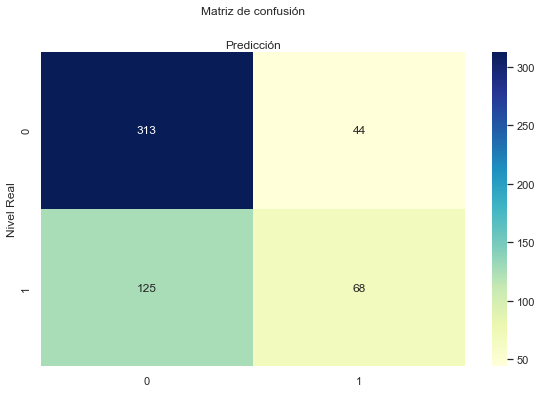

In [29]:
RF_matrix = metrics.confusion_matrix(y_test, y_pred_RF)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(RF_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de confusión', y=1.1)
plt.ylabel('Nivel Real')
plt.xlabel('Predicción')

**Resultados**

In [30]:
acc_KNN = KNN.score(X_test, y_test)
acc_LR = LR.score(X_test, y_test)
acc_SVC = SVC.score(X_test, y_test)
acc_RF = RF.score(X_test, y_test)



acc_KNN = "{:.2f}".format(acc_KNN)
acc_LR = "{:.2f}".format(acc_LR)
acc_SVC = "{:.2f}".format(acc_SVC)
acc_RF = "{:.2f}".format(acc_RF)


resultados = pd.DataFrame( data = [['KNN', acc_KNN],
                                ['LR', acc_LR],
                                ['SVC', acc_SVC],
                                ['RF', acc_RF]],
                                 columns = ['Modelo', 'Accuracy'])
resultados.head()



,Modelo,Accuracy
0,KNN,0.65
1,LR,0.67
2,SVC,0.65
3,RF,0.69


In [31]:
from sklearn.metrics import f1_score
f1_KNN = f1_score(y_test, y_pred_KNN, average='macro')
f1_LR = f1_score(y_test, y_pred_LR, average='macro')
f1_SVC = f1_score(y_test, y_pred_SVC, average='macro')
f1_RF = f1_score(y_test, y_pred_RF, average='macro')


f1_KNN = "{:.2f}".format(f1_KNN)
f1_LR = "{:.2f}".format(f1_LR)
f1_SVC = "{:.2f}".format(f1_SVC)
f1_RF = "{:.2f}".format(f1_RF)


resultados = pd.DataFrame( data = [['KNN', acc_KNN, f1_KNN],
                                [ 'LR', acc_LR, f1_LR],
                                ['SVC', acc_SVC,f1_SVC ],
                                ['RF', acc_RF, f1_RF]],
                       columns = ['Modelo', 'Accuracy', 'F1'])
resultados

,Modelo,Accuracy,F1
0,KNN,0.65,0.52
1,LR,0.67,0.55
2,SVC,0.65,0.39
3,RF,0.69,0.62


In [32]:
from sklearn.model_selection import cross_val_score

cv_KNN = cross_val_score(KNN, X, y, cv=5, scoring='f1_macro')
cv_LR = cross_val_score(LR, X, y, cv=5, scoring='f1_macro')
cv_SVC = cross_val_score(SVC, X, y, cv=5, scoring='f1_macro')
cv_RF = cross_val_score(RF, X, y, cv=5, scoring='f1_macro')

cv_KNN = "{:.2f}".format(cv_KNN.mean())
cv_LR = "{:.2f}".format(cv_LR.mean())
cv_SVC = "{:.2f}".format(cv_SVC.mean())
cv_RF = "{:.2f}".format(cv_RF.mean())


resultados = pd.DataFrame( data = [['KNN', acc_KNN, f1_KNN, cv_KNN],
                                [ 'LR', acc_LR, f1_LR, cv_LR],
                                ['SVC', acc_SVC,f1_SVC, cv_SVC],
                                ['RF', acc_RF, f1_RF, cv_RF]],
                       columns = ['Modelo', 'Accuracy', 'F1', 'CV con F1'])
resultados

,Modelo,Accuracy,F1,CV con F1
0,KNN,0.65,0.52,0.54
1,LR,0.67,0.55,0.56
2,SVC,0.65,0.39,0.42
3,RF,0.69,0.62,0.61


# Mejorar parametros

Se buscará mejorar los parámetros de los dos mejores modelos: KNN y RF

In [33]:
from sklearn.model_selection import RandomizedSearchCV
import warnings 
warnings.filterwarnings('ignore')

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]


random_grid = {'n_estimators': n_estimators,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': bootstrap}

rf = RandomForestClassifier(random_state=42)

rf_random = RandomizedSearchCV(estimator = rf,
                                param_distributions = random_grid,
                                n_iter = 100, 
                                cv = 5, 
                                scoring='neg_mean_absolute_error', 
                                verbose=2, 
                                random_state=42, 
                                n_jobs = -1)


rf_random.fit(X,y.values.ravel())



Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 288, 377, 466,
                                                         555, 644, 733, 822,
                                                         911, 1000]},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=2)

In [34]:
print(rf_random.best_params_)

{'n_estimators': 911, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': None, 'bootstrap': True}


In [41]:
RF_BP = RandomForestClassifier(random_state=42, n_estimators = 911, min_samples_split = 2, min_samples_leaf = 2, 
                               max_features = 'auto', max_depth = 20, bootstrap = True)

Nota: los best paraneters sugieren 'max_depth': None, pero eso arroja error. El mejor resultado se obtiene con el valor 20.

In [42]:
RF_BP.fit(X_train, y_train)
y_pred_RF_BP = RF_BP.predict(X_test)


acc_RF_BP = RF_BP.score(X_test, y_test)
acc_RF_BP = "{:.2f}".format(acc_RF_BP)

f1_RF_BP = f1_score(y_test, y_pred_RF_BP, average='macro')
f1_RF_BP = "{:.2f}".format(f1_RF_BP)

cv_RF_BP = cross_val_score(RF_BP, X, y, cv=5, scoring='f1_macro')
cv_RF_BP = "{:.2f}".format(cv_RF_BP.mean())

Text(0.5, 320.8, 'Predicción')

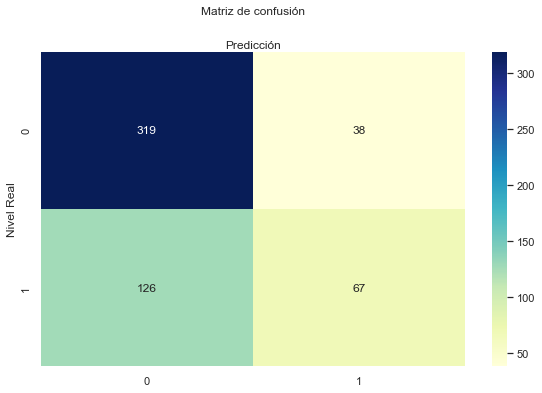

In [43]:
RF_BP_matrix = metrics.confusion_matrix(y_test, y_pred_RF_BP)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(RF_BP_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de confusión', y=1.1)
plt.ylabel('Nivel Real')
plt.xlabel('Predicción')

Text(0, 0.5, 'F1 Score')

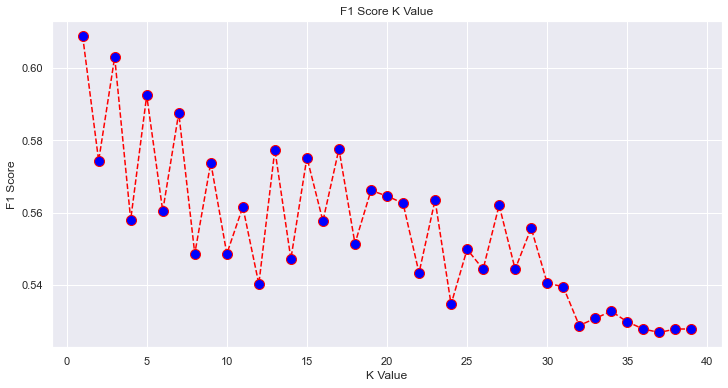

In [45]:
f1s = []

# Calculating f1 score for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    # using average='weighted' to calculate a weighted average for the 4 classes 
    f1s.append(f1_score(y_test, pred_i, average='weighted'))
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), f1s, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')

In [61]:
KNN3 = KNeighborsClassifier(n_neighbors=3)
KNN3.fit(X_train, y_train)
y_pred_KNN1 = KNN1.predict(X_test)

acc_KNN3 = KNN1.score(X_test, y_test)
acc_KNN3 = "{:.2f}".format(acc_KNN1)


f1_KNN3 = f1_score(y_test, y_pred_KNN3, average='macro')
f1_KNN3 = "{:.2f}".format(f1_KNN3)

cv_KNN3 = cross_val_score(KNN3, X, y, cv=5, scoring='f1_macro')
cv_KNN3 = "{:.2f}".format(cv_KNN3.mean())

In [62]:
resultados = pd.DataFrame( data = [['KNN', acc_KNN, f1_KNN, cv_KNN],
                                   ['KNN BP', acc_KNN3, f1_KNN3, cv_KNN3],
                                   ['LR', acc_LR, f1_LR, cv_LR],
                                   ['SVC', acc_SVC,f1_SVC, cv_SVC],
                                   ['RF', acc_RF, f1_RF, cv_RF],
                                   ['RF BP', acc_RF_BP, f1_RF_BP, cv_RF_BP]],
                       columns = ['Modelo', 'Accuracy', 'F1', 'CV con F1'])
resultados

,Modelo,Accuracy,F1,CV con F1
0,KNN,0.65,0.52,0.54
1,KNN BP,0.64,0.54,0.55
2,LR,0.67,0.55,0.56
3,SVC,0.65,0.39,0.42
4,RF,0.69,0.62,0.61
5,RF BP,0.70,0.62,0.62


# Balancear la muestra

Al existir una relación de 2 a 1 entre la clase 0 (pacientes que permanencen menos de una semana) y la clase 1 (permanecen más de una semana) se balanceará la muestra en partes iguales, creando aleatoriamente muestras de la clase 1 con la librería Imbalanced-Learn

In [46]:
y['GruposDiasInternacion'].value_counts()

0    1231
1     600
Name: GruposDiasInternacion, dtype: int64

In [47]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X, y)
y_over['GruposDiasInternacion'].value_counts()

1    1231
0    1231
Name: GruposDiasInternacion, dtype: int64

# Modelo final

Todo el proceso con over sampling y Random Forest que se ha mostrado como el mejor modelo

In [48]:
X_over_train, X_over_test, y_over_train, y_over_test = train_test_split(X_over, y_over, random_state=0, train_size = 0.7)
print(X_over_train.shape, X_over_test.shape, y_over_train.shape, y_over_test.shape)

(1723, 26) (739, 26) (1723, 1) (739, 1)


In [51]:
RF_final = RandomForestClassifier(random_state=42, n_estimators = 911, min_samples_split = 2, min_samples_leaf = 2, 
                               max_features = 'auto', max_depth = 20, bootstrap = True)

RF_final.fit(X_over_train, y_over_train)
y_pred_RF_final = RF_final.predict(X_over_test)


acc_RF_final = RF_final.score(X_over_test, y_over_test)
acc_RF_final = "{:.2f}".format(acc_RF_final)

f1_RF_final = f1_score(y_over_test, y_pred_RF_final, average='macro')
f1_RF_final = "{:.2f}".format(f1_RF_final)

cv_RF_final = cross_val_score(RF_final, X_over, y_over, cv=5, scoring='f1_macro')
cv_RF_final = "{:.2f}".format(cv_RF_final.mean())

Text(0.5, 320.8, 'Predicción')

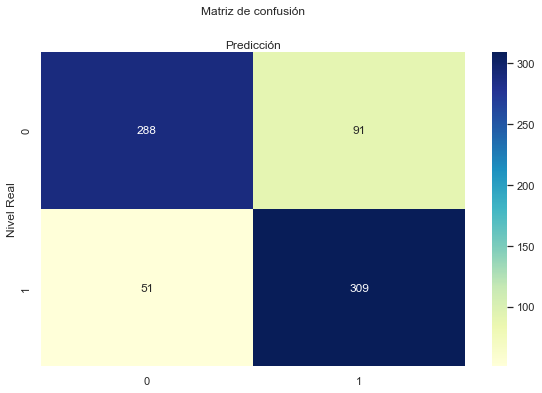

In [52]:
RF_final_matrix = metrics.confusion_matrix(y_over_test, y_pred_RF_final)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(RF_final_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de confusión', y=1.1)
plt.ylabel('Nivel Real')
plt.xlabel('Predicción')

In [53]:
y_over_test['GruposDiasInternacion'].value_counts()

0    379
1    360
Name: GruposDiasInternacion, dtype: int64

In [54]:
resultados = pd.DataFrame( data = [['KNN', acc_KNN, f1_KNN, cv_KNN],
                                [ 'LR', acc_LR, f1_LR, cv_LR],
                                ['SVC', acc_SVC,f1_SVC, cv_SVC],
                                ['RF', acc_RF, f1_RF, cv_RF],
                                [ 'RF BP', acc_RF_BP, f1_RF_BP, cv_RF_BP],
                                ['RF FINAL', acc_RF_final, f1_RF_final, cv_RF_final]],
                       columns = ['Modelo', 'Accuracy', 'F1', 'CV con F1'])
resultados

,Modelo,Accuracy,F1,CV con F1
0,KNN,0.65,0.52,0.54
1,LR,0.67,0.55,0.56
2,SVC,0.65,0.39,0.42
3,RF,0.69,0.62,0.61
4,RF BP,0.70,0.62,0.62
5,RF FINAL,0.81,0.81,0.84


In [56]:
#Medición de recall
from sklearn.metrics import recall_score

recall_RF_final = recall_score(y_over_test, y_pred_RF_final, average='macro')
recall_RF_final = "{:.2f}".format(recall_RF_final)


recall_RF_final 

'0.81'

# Conclusión 
Sobre un Data Set con 2047 pacientes que estuvieron en Terapia Intensiva más de dos días, y que contaba con datos de edad, sexo, y 24 tomas de datos vitales durante sus primeras dos jornadas de internación, se ha realizado un análisis y limpieza de la información por un lado, y se ha aplicado un modelo predictivo de clasificación por el otro, para predecir si en función de las variables dadas podría saberse si el paciente estaría internado más de una semana o no.
Se ha probado con diferentes modelos predictivos de la libreria scikit-learn, y luego se han medido sus resultados. La mejor precisión la tuvo el modelo Random Forest con un 69%, aunque teniendo en cuanta que la muestra arrojaba poco más de 1/3 de los casos para una de las clases (la clase 0, pacientes que están menos de una semana internados) resultaba aceptable, pero baja.
Se trabajó para optimizar los resultados, primero mejorando los parámetros del modelo, con el paquete RandomizedSearchCV, de la librería ya mencionada, y luego creando nuevos casos de la clase 1 (personas que están internadas más de una semana) utilizando la librería imblearn.
Mediante este proceso se pasó a una precisión del 81% que llega al 84% con la validación cruzada. El número de falsos positivos de la clase 0 aumentó, pero disminuyó el de la clase 1 que son las fallas que más se busca evitar ya que es preferible suponer que un paciente se quedará más de una semana y que luego no lo haga que al revés.
